In [5]:
import numpy as np
 
bounds = [-np.inf, 0, 1, 2, 4, 6, 9, np.inf]
intervals = []
 
closed = False
for i in range(len(bounds) - 1):
    left = bounds[i]
    right = bounds[i+1]
    
    intervals.append((left, right, 'closed' if closed else 'open'))
 
    closed = not closed
    
def dif(i1, i2):
    if i1[0] >= i2[1]:
        i1,i2 = i2,i1
        
    label = 'closed' if i1[2] == 'closed' and i2[2] == 'closed' else 'open'
    
    a = i2[0] - i1[1]
    b = i2[1] - i1[0]
    return (a, b, (label, label), b-a)
    
difs = []
 
it = intervals
    
def produce(ex, n, res):
    
    for i in range(n):
        for j in range(i+1,n):
            if (i,j) in res:
                x = dif(it[ex[i]],it[ex[j]])
                old = res[(i,j)]
                
                a = max(x[0], old[0])
                b = min(x[1], old[1])
                
                label = (
                    x[2][0] if x[0] > old[0] else old[2][0],
                    x[2][1] if x[1] < old[1] else old[2][1]
                )
                
                res[(i,j)] = (a, b, label, b-a)
            else:
                res[(i, j)] = dif(it[ex[i]],it[ex[j]])
            
            #print(i+1,j+1,dif(it[ex[i]],it[ex[j]]))
            
    return res

def pa(x): return "[" if x == 'closed' else "("
def pb(x): return "]" if x == 'closed' else ")"
 
def show(r):
    for k in r:
        le,rr = k
        a,b = r[k][0],r[k][1]
        print(f"x_{rr+1} - x_{le+1} in {pa(r[k][2][0])}{r[k][0]},{r[k][1]}{pb(r[k][2][1])}, len {b-a}")

        
def showk(ll, rr, k):
    a,b = k[0],k[1]
    return f"x_{rr+1} - x_{ll+1} in {pa(k[2][0])}{k[0]},{k[1]}{pb(k[2][1])}, interval len {b-a}"
        
labels = {
         "11111": [
        (5,5,5,5,5),
        (3,5,5,5,5),
        (3,3,5,5,5),
        (3,3,3,5,5),
        (3,3,3,3,5),
        (3,3,3,3,3),
        (1,5,5,5,5),
        (1,3,5,5,5),
        (1,3,3,5,5),
        (1,3,3,3,5),
        (1,3,3,3,3),
        (1,1,5,5,5),
        (1,1,3,5,5),
        (1,1,3,3,5),
        (1,1,3,3,3),
        (1,1,1,5,5),
        (1,1,1,3,5),
        (1,1,1,3,3),
        (1,1,1,1,5),
        (1,1,1,1,3),
        (1,1,1,1,1),
    ],
    
    "10101": [
        (1,2,3,4,5)
    ],
   
    "11001": [
        (1, 1, 2, 2, 1),
        (1, 1, 2, 2, 5),
        (1, 1, 2, 4, 5),
        (1, 1, 4, 4, 5),
        (1, 3, 4, 4, 5),
        (3, 3, 4, 4, 5)
    ],
    "10011": [
        (3, 4, 4, 5, 5),
        (1, 4, 4, 5, 5),
        (1, 2, 4, 5, 5),
        (1, 2, 2, 5, 5),
        (1, 2, 2, 3, 5),
        (1, 2, 2, 3, 3)
    ],
}

ls = list(labels.keys())
    
def bt(i, r, l):
    if i==len(ls):
        return True

    for q in labels[ls[i]]:
        rcp = r.copy()
        produce(q, len(q), rcp)
        
        good = True
        bad = None
        bad_ss = None
        for ss, k in rcp.items():
            if k[-1] <= 0:
                good = False
                bad = k
                bad_ss = ss
                break
                
        if not good:
            s = l + [q]
            print(' + '.join(map(str, s)), "=>", showk(ss[0], ss[1], k), "(contradiction)")
            continue
        
        l.append(q)
        x = bt(i+1, rcp, l)
        l.pop()
        
        if x:
            return True

    return False

bt(0, {}, [])

(5, 5, 5, 5, 5) + (1, 2, 3, 4, 5) => x_4 - x_1 in (3,3], interval len 0 (contradiction)
(3, 5, 5, 5, 5) + (1, 2, 3, 4, 5) => x_2 - x_1 in [2,2), interval len 0 (contradiction)
(3, 3, 5, 5, 5) + (1, 2, 3, 4, 5) + (1, 1, 2, 2, 1) => x_3 - x_1 in [2,2), interval len 0 (contradiction)
(3, 3, 5, 5, 5) + (1, 2, 3, 4, 5) + (1, 1, 2, 2, 5) => x_3 - x_1 in [2,2), interval len 0 (contradiction)
(3, 3, 5, 5, 5) + (1, 2, 3, 4, 5) + (1, 1, 2, 4, 5) => x_3 - x_1 in [2,2), interval len 0 (contradiction)
(3, 3, 5, 5, 5) + (1, 2, 3, 4, 5) + (1, 1, 4, 4, 5) => x_3 - x_2 in (3,3), interval len 0 (contradiction)
(3, 3, 5, 5, 5) + (1, 2, 3, 4, 5) + (1, 3, 4, 4, 5) + (3, 4, 4, 5, 5) => x_3 - x_2 in [2,2), interval len 0 (contradiction)
(3, 3, 5, 5, 5) + (1, 2, 3, 4, 5) + (1, 3, 4, 4, 5) + (1, 4, 4, 5, 5) => x_2 - x_1 in (3,2], interval len -1 (contradiction)
(3, 3, 5, 5, 5) + (1, 2, 3, 4, 5) + (1, 3, 4, 4, 5) + (1, 2, 4, 5, 5) => x_4 - x_2 in (4,4), interval len 0 (contradiction)
(3, 3, 5, 5, 5) + (1, 2, 3,

False

In [88]:
def r(i, v):
    return [str(v) for j in range(i)]

for i in range(0,6):
    for j in range(0,6):
        for k in range(0,6):
            if i+j+k==5:
                q = r(i,1) + r(j,3) + r(k,5)
                q = ','.join(q)
                print(f"({q}),")

(5,5,5,5,5),
(3,5,5,5,5),
(3,3,5,5,5),
(3,3,3,5,5),
(3,3,3,3,5),
(3,3,3,3,3),
(1,5,5,5,5),
(1,3,5,5,5),
(1,3,3,5,5),
(1,3,3,3,5),
(1,3,3,3,3),
(1,1,5,5,5),
(1,1,3,5,5),
(1,1,3,3,5),
(1,1,3,3,3),
(1,1,1,5,5),
(1,1,1,3,5),
(1,1,1,3,3),
(1,1,1,1,5),
(1,1,1,1,3),
(1,1,1,1,1),


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch

In [202]:
def h(a, b, c, d): return a + c * np.sin(b) + d * np.cos(b)

ys = {
    (0,0,0): [-1, 0],
    (0,0,1): [-0.5,1.5],
    (0,1,0): [0,0],
    (0,1,1): [-0.5,1],
    (1,0,0): [0.5,4],
    (1,0,1): [0.5,-3],
    (1,1,0): [0.5,-1.5],
    (1,1,1): [1,0],
}

assert len(ys.keys()) == 8

points = [[0,0],[0,1],[1,0]]

i = 1
for y in ys:
    theta1, theta2 = ys[y]
    
#     for p in points:
#         print(f"p = {p} {theta1} {np.sin(theta2) * p[0]} {np.cos(theta2) * p[1]} {theta1 + np.sin(theta2) * p[0] + np.cos(theta2) * p[1]} h = {h(theta1, theta2, *p)}")
    
    y_hat = tuple(1 if h(theta1, theta2, x1, x2) > 0 else 0 for x1,x2 in points)
    
#     print(y, y_hat)
    assert y == y_hat
    
    print(f"""\
\\item $y_{i} = {y}$: $\\theta_1 = {theta1}, \\,\\, \\theta_2 = {theta2}$;""")
    i+=1

\item $y_1 = (0, 0, 0)$: $\theta_1 = -1, \,\, \theta_2 = 0$;
\item $y_2 = (0, 0, 1)$: $\theta_1 = -0.5, \,\, \theta_2 = 1.5$;
\item $y_3 = (0, 1, 0)$: $\theta_1 = 0, \,\, \theta_2 = 0$;
\item $y_4 = (0, 1, 1)$: $\theta_1 = -0.5, \,\, \theta_2 = 1$;
\item $y_5 = (1, 0, 0)$: $\theta_1 = 0.5, \,\, \theta_2 = 4$;
\item $y_6 = (1, 0, 1)$: $\theta_1 = 0.5, \,\, \theta_2 = -3$;
\item $y_7 = (1, 1, 0)$: $\theta_1 = 0.5, \,\, \theta_2 = -1.5$;
\item $y_8 = (1, 1, 1)$: $\theta_1 = 1, \,\, \theta_2 = 0$;


In [238]:
def h(theta, x): return (theta <= x and x <= theta + 1) or \
    (theta + 2 <= x and x <= theta + 4) or \
    (theta + 6 <= x and x <= theta + 9)

ps = [1, 1.5, 3, 5.5]

ys = {
    (0,0,0,0): 0,
    (0,0,0,1): 0,
    (0,0,1,0): 0,
    (0,0,1,1): 0,
    (0,1,0,0): 0,
    (0,1,0,1): 0,
    (0,1,1,0): 0,
    (0,1,1,1): 0,
    
    (1,0,0,0): 0,
    (1,0,0,1): 0,
    (1,0,1,0): 0,
    (1,0,1,1): 0,
    (1,1,0,0): 0,
    (1,1,0,1): 0,
    (1,1,1,0): 0,
    (1,1,1,1): 0,
}

i = 1
for y in ys:
    theta = ys[y]
    
    if y != y_hat:
        for theta in np.arange(-20,20,0.1):
            theta = np.around(theta, 2)
            
            y_hat = tuple(1 if h(theta, p) else 0 for p in ps)
            if y == y_hat:
                break
    
#     print(theta, y, y_hat)
    assert y == y_hat
        
    print(f"""\
\\item $y_{i} = {y}$: $\\theta = {theta}$;""")
    i+=1

print(i)
assert i == 2**4+1


\item $y_1 = (0, 0, 0, 0)$: $\theta = -20.0$;
\item $y_2 = (0, 0, 0, 1)$: $\theta = 1.6$;
\item $y_3 = (0, 0, 1, 0)$: $\theta = -4.4$;
\item $y_4 = (0, 0, 1, 1)$: $\theta = -3.5$;
\item $y_5 = (0, 1, 0, 0)$: $\theta = 1.1$;
\item $y_6 = (0, 1, 0, 1)$: $\theta = 1.5$;
\item $y_7 = (0, 1, 1, 0)$: $\theta = -4.9$;
\item $y_8 = (0, 1, 1, 1)$: $\theta = -0.9$;
\item $y_9 = (1, 0, 0, 0)$: $\theta = -8.0$;
\item $y_10 = (1, 0, 0, 1)$: $\theta = -2.9$;
\item $y_11 = (1, 0, 1, 0)$: $\theta = 0.0$;
\item $y_12 = (1, 0, 1, 1)$: $\theta = -3.0$;
\item $y_13 = (1, 1, 0, 0)$: $\theta = -7.5$;
\item $y_14 = (1, 1, 0, 1)$: $\theta = -2.5$;
\item $y_15 = (1, 1, 1, 0)$: $\theta = -6.0$;
\item $y_16 = (1, 1, 1, 1)$: $\theta = -1.0$;
17


In [153]:
def h(a,b,c, x1, x2): return c + a*x1 + b*x2

outputs = []


s = set()

points = [(0, 0), (1, 0), (0, 1)]

for a in np.arange(-1, 1, 0.1):
    for b in np.arange(-1, 1, 0.1):
        for c in np.arange(-10, 10, 0.1):
            a,b,c = [np.around(x, 2) for x in [a,b,c]] 
            a,b,c = [np.abs(x) if np.isclose(x, 0) else x for x in [a,b,c]] 
            
            if not np.isclose(a**2 + b**2, 1):
                continue
            
            if not np.isclose(np.arcsin(a), np.arccos(b)):
                continue
            
            y = tuple(1 if h(a,b,c,x1,x2) > 0 else 0 for (x1,x2) in points)
            
            if y in s:
                continue
                
            s.add(y)
            
            print(f"y = {y}")
            print(f"a = {a} b = {b} c = {c}")
            print(f"theta_1 = {c} theta_2 = {np.arcsin(a)} = {np.arccos(b)}")
            
                
            y_hat = tuple(1 if h(a,b,c,x1,x2) > 0 else 0 for (x1,x2) in points)
            assert y_hat == y
            assert np.isclose(np.arcsin(a), np.arccos(b))
                
#             print(f"y = {y_hat}")
#             print(f"a = {a} b = {b} c = {c}")
            
            print("\n\n")
        
#             outputs.append([
#                 y,
#                 f"""\
# \\item $y_{i} = {y}$

#                 """
#             ])
#             print(f"theta1 = {c} theta2 = {np.arcsin(a)}")
            
# for i in range(8):
#     print(f"pi/4 * {i} = {np.pi/4 * i}")
        
print(len(s))
print(s)

print("\n\n")
print(output)

y = (0, 0, 0)
a = 0.6 b = 0.8 c = -10.0
theta_1 = -10.0 theta_2 = 0.6435011087932844 = 0.6435011087932843



y = (0, 0, 1)
a = 0.6 b = 0.8 c = -0.7
theta_1 = -0.7 theta_2 = 0.6435011087932844 = 0.6435011087932843



y = (0, 1, 1)
a = 0.6 b = 0.8 c = -0.5
theta_1 = -0.5 theta_2 = 0.6435011087932844 = 0.6435011087932843



y = (1, 1, 1)
a = 0.6 b = 0.8 c = 0.1
theta_1 = 0.1 theta_2 = 0.6435011087932844 = 0.6435011087932843



y = (0, 1, 0)
a = 0.8 b = 0.6 c = -0.7
theta_1 = -0.7 theta_2 = 0.9272952180016123 = 0.9272952180016123



5
{(0, 1, 0), (0, 0, 0), (0, 0, 1), (1, 1, 1), (0, 1, 1)}





NameError: name 'output' is not defined

In [176]:
def h(a, b, c, d): return a + c * np.sin(b) + d * np.cos(b)

points = [[0,0],[0,1],[1,0]]

s = set()

for theta1 in np.arange(-50.0, 50.0, 0.1):
    for theta2 in np.arange(-10, 10, 0.1):
        y = tuple(1 if h(theta1, theta2, x1, x2) > 0 else 0 for (x1,x2) in points)
        if y in theta
        
        s.add(y)
        

print(s)

{(1, 0, 1), (1, 1, 0), (0, 1, 0), (0, 0, 0), (1, 0, 0), (0, 0, 1), (1, 1, 1), (0, 1, 1)}


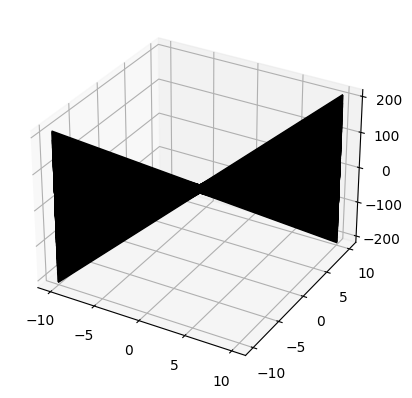

In [107]:
ax = plt.axes(projection='3d')

for b in np.linspace(-10, 10, 10):
    for w1 in np.linspace(-10, 10, 10):
        for w2 in np.linspace(-10, 10, 10):

            xline = np.linspace(-10, 10, 10)
            yline = np.linspace(-10, 10, 10)

            zline = b + w1*xline + w2*yline

            ax.plot3D(xline, yline, zline, 'black')

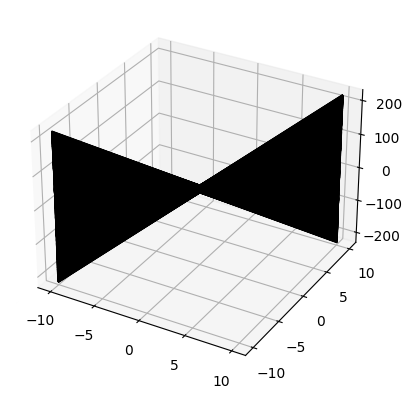

In [112]:
ax = plt.axes(projection='3d')

for theta_1 in np.linspace(-10, 10, 20):
    for theta_2 in np.linspace(-10, 10, 50):
    
        xline = np.linspace(-10, 10, 10)
        yline = np.linspace(-10, 10, 10)

        zline = theta_1 + 15*xline * np.sin(theta_2) + 15*yline * np.cos(theta_2)

        ax.plot3D(xline, yline, zline, 'black')

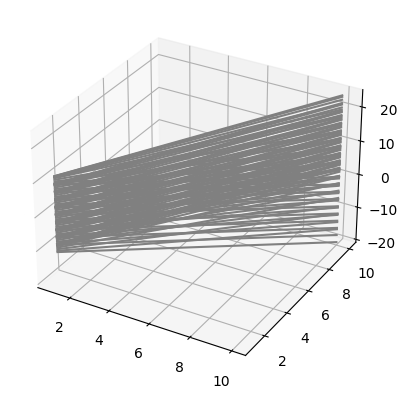

In [56]:
ax = plt.axes(projection='3d')

theta_1 = 0
theta_2 = 0

for theta_1 in np.linspace(-10, 10, 10):
    for theta_2 in np.linspace(-np.pi/2, np.pi/2, 10):
    
        xline = np.linspace(1, 10, 100)
        yline = np.linspace(1, 10, 100)

        A = np.sqrt(xline**2 + yline**2)
        phi = np.arctan(yline / xline)
        zline = theta_1 + A * np.sin(theta_2 + phi)

        ax.plot3D(xline, yline, zline, 'gray')

In [69]:
# axes = a and b
a_min_star = -4
a_max_star = 5
a_len_star = np.abs(a_max_star - a_min_star)

b_min_star = -4
b_max_star = 8
b_len_star = np.abs(b_max_star - b_min_star)

alpha = a_len_star / b_len_star

def f(a, b):
    return a_min_star <= a <= a_max_star and b_min_star <= b <= b_max_star

assert f(2, 4) == True
assert np.isclose(alpha, 3/4)

In [117]:
m = 200
S = np.random.uniform(0, 10, (m, 2))
S = [(p[0], p[1], f(p[0], p[1])) for p in S]
S = np.array(S, dtype=object)
S.shape, S[:5]

((200, 3),
 array([[6.68840366742924, 9.759057923556403, False],
        [4.158002588898802, 7.586499751374905, True],
        [4.897469931392624, 3.570836601716204, True],
        [0.5835415172133807, 4.45481694649735, True],
        [1.221058781019041, 8.576487095099216, False]], dtype=object))

In [177]:
# solve for 'erm', 'alpha', 'naive'
def learn_h(alpha, S, solve_for='erm'):
    # 1. compute minimal rectangle for positive examples
    S_positive = S[S[:, 2] == True]
    a_min = np.min(S_positive[:, 0])
    a_max = np.max(S_positive[:, 0])
    b_min = np.min(S_positive[:, 1])
    b_max = np.max(S_positive[:, 1])
    a_len = np.abs(a_max - a_min)
    b_len = np.abs(b_max - b_min)
    
    # 2. compute minimal rectangle ratio and exit if good
    beta = a_len / b_len
    
    if np.isclose(alpha, beta) or solve_for == 'naive':
        return a_min, b_min, a_len, b_len, \
            lambda a,b: a_min <= a <= a_min + a_len and b_min <= b <= b_min + b_len
    
    # 3. expand the rectangle to match the ratio
    a_prime_len = a_len
    b_prime_len = b_len
    
    if beta < alpha:
        a_prime_len += alpha * b_len - a_len
    else:
        b_prime_len += a_len / alpha - b_len
        
    assert np.isclose(a_prime_len / b_prime_len, alpha)
    
    if solve_for == 'alpha':
        return a_min, b_min, a_prime_len, b_prime_len, \
            lambda a,b: a_min <= a <= a_min + a_prime_len and b_min <= b <= b_min + b_prime_len
    
    # 4. find the closest points we misclassify as being positive
    a_i_min = np.inf
    b_i_min = np.inf
    
    for (a_i, b_i, y_i) in S:
        if y_i == True:
            continue
            
        if a_min <= a_i and a_i <= a_min + a_prime_len and b_min <= b_i and b_i <= b_min + b_prime_len:
            a_i_min = min(a_i_min, a_i)
            b_i_min = min(b_i_min, b_i)
    
    # 5. find the correct displacement of the rectangle
    a_prime_max = a_min + a_prime_len
    b_prime_max = b_min + b_prime_len
    
    delta = 1e-5
    if beta < alpha and a_i_min != np.inf:
        a_prime_max = a_i_min - delta
    elif b_i_min != np.inf:
        b_prime_max = b_i_min - delta
    
    # 6. compute the final length
    a_second_len = a_prime_max - a_min
    b_second_len = b_prime_max - b_min
    
    return a_min, b_min, a_second_len, b_second_len, \
        lambda a,b: a_min <= a <= a_min + a_second_len and b_min <= b <= b_min + b_second_len

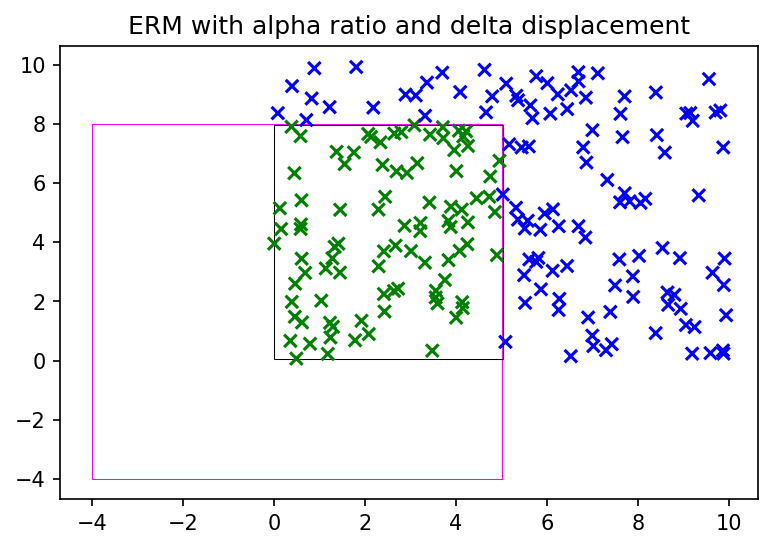

In [184]:
a_min, b_min, a_len, b_len, h = learn_h(alpha, S, 'erm')
y_wrong = [(p[0], p[1], 'red') for p in S if p[2] != h(p[0], p[1])]
y_wrong = np.array(y_wrong, dtype=object)

R_S = ptch.Rectangle((a_min, b_min), a_len, b_len, edgecolor='black', facecolor='none', linewidth=0.5)
R_star = ptch.Rectangle((a_min_star, b_min_star), a_len_star, b_len_star, edgecolor='magenta', facecolor='none', linewidth=0.5)

fig, ax = plt.subplots(dpi=150)
ax.set_title('ERM with alpha ratio and delta displacement')
ax.add_patch(R_star)
ax.add_patch(R_S)
ax.scatter(S[:, 0], S[:, 1], c=['green' if y else 'blue' for y in S[:, 2]], marker='x')
if len(y_wrong):
    ax.scatter(y_wrong[:, 0], y_wrong[:, 1], c=y_wrong[:, 2], marker='x')


plt.show()